# Exercise 11.2

### Introduction
The purpose of this second exercise is to develope the first **Deep Neural Network**, and use different optimizers and losses, in order to find the best to fit a new dataset.

### Dataset
The set is made of 5200 points, their *x* is uniformly generated in $[-1, 1)$, while *y* is calculated using the following third order polynomial

$$
y = 4 - 3 x - 2 x^2 + 3 x^3
$$

This time a Gaussian noise is applied onto the ordinates, with a certain $\sigma$, in order to avoid overfitting, if this effect does not occur, the noise can be rmoved by setting it to zero.

5000 points compose the training set, and the other 200 points are the validation set.

### Neural Network
The neural network is sequential, made of three layers of relu activated neurons: the first one is made of 50 neurons, the second one is made of 100 neurons, in order to increase the representativeness, and a final layer made of only one neuron, to provide the expected output of just one value. As optimizer has been chosen the **Adam**, and as loss measure has been chosen the **mean squared logarithmic error**.

The network has been trained for 50 epochs, dividing the training set into batch of 20 elements each, and shuffling the set at the end of every epoch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Cubic function to fit
def f(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

xlim = 1.
# Fixing the training, validation & fitting parameters
# Training
ntrain = 5000
sigma = 0.1     # Noise
# Validation
nvalid = 200
# Fitting
bsize = 20
nepoc = 50
# Fixing Neural Network parameters
# Number of hidden neurons per layer
nhn1 = 50
nhn2 = 100

# Generation of training and validation points
np.random.seed(10)
x_t = np.random.uniform(-xlim, xlim, ntrain)
x_v = np.random.uniform(-xlim, xlim, nvalid)
x_v.sort()
y_t = np.random.normal(f(x_t), sigma)
y_v = np.random.normal(f(x_v), sigma)
# Ideal linear function (for comparison)
y_c = f(x_v)

# Neural network setup
model = Sequential()
model.add(Dense(nhn1, input_shape=(1,), activation="relu"))
model.add(Dense(nhn2, activation="relu"))
model.add(Dense(1, activation="relu"))
# Neural network compile
model.compile(optimizer="adam", loss="mean_squared_logarithmic_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [2]:
# Fit the model (trainig dataset)
history = model.fit(x=x_t, y=y_t, batch_size=bsize,
                    epochs=nepoc, verbose=1, shuffle=True, validation_data=(x_v, y_v))

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.2878 - val_loss: 0.0349
Epoch 2/50
250/250 [==============================] - 0s 727us/step - loss: 0.0278 - val_loss: 0.0110
Epoch 3/50
250/250 [==============================] - 0s 731us/step - loss: 0.0086 - val_loss: 0.0031
Epoch 4/50
250/250 [==============================] - 0s 763us/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/50
250/250 [==============================] - 0s 719us/step - loss: 0.0015 - val_loss: 0.0010
Epoch 6/50
250/250 [==============================] - 0s 711us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/50
250/250 [==============================] - 0s 691us/step - loss: 9.2818e-04 - val_loss: 9.6754e-04
Epoch 8/50
250/250 [==============================] - 0s 675us/step - loss: 8.8097e-04 - val_loss: 8.5647e-04
Epoch 9/50
250/250 [==============================] - 0s 683us/step - loss: 8.2058e-04 - val_loss: 7.7982e-04
Epoch 10/50
250/250 [==============================] - 0s 68

### Results
The plot below shows the trend of the losses of the training and validation set in function of the epochs. More epochs can be performed, but the result does not improve anymore, then it is important to save resources.


Test loss (validation) = 0.0007879477925598621

Test loss (comparison) = 0.00013349179062061012


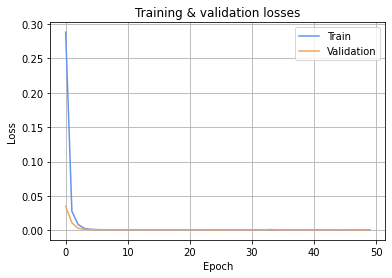

In [3]:
# Evaluate the model (validation)
score = model.evaluate(x_v, y_v, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (validation) =", score)
# Evaluate the model (comparison)
score = model.evaluate(x_v, y_c, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (comparison) =", score)

# Plot training and validation losses
plt.plot(history.history["loss"], color="cornflowerblue")
plt.plot(history.history["val_loss"], color="sandybrown")
plt.title("Training & validation losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()
plt.show()

### Predictions
The result can be tested generating 100 points, and using the predict method of the trained model to estimate the value of the *y* according to the given *x*. The plot shows a very good agreement between the prediction and the defined straight line. This plot has been used a lot to determine the best optimizer and loss, in particular, the most difficult part to fit is $[0.75, 1)$, where the slope of the tangent line very small, in other words, where the function has very little variations.

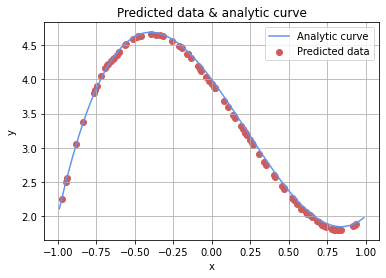

In [4]:
# Let's predict some data
x_p = np.random.uniform(-xlim, xlim, 100)
y_p = model.predict(x_p)
# Plot the predicted points & the comparison data
plt.plot(x_v, y_c, color="cornflowerblue")
plt.scatter(x_p, y_p, color="indianred")
plt.title("Predicted data & analytic curve")
plt.legend(["Analytic curve", "Predicted data"], loc=0)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Another interisting test that can be made on the trained **DNN** is try to predict the ordinate of a point outside the training interval, for example one can see what is the prediction for $x = 2$, the expected result should be $f(2) = 14$.

The plot above shows a good agreement between the analytic curve and the predicted data, while the prediction below is terrible, this fact is due to the characteristics of a Neural Network and its predictive power, which is strictly related to the training and validation data it has seen.

In [5]:
print("Model =", f(2.))
print("Prediction =", float(model.predict([2.])))

Model = 14.0
Prediction = 2.6264798641204834
